# Netflix - Project Analysis 


### TV Shows and Movies listed on Netflix

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### Analysis 

With the given dataset I want to discover the following:

- What is more viewed, tv shows or movies?
- What countries have the highest viewing rates?
- What genre (listed in) is the most popular?
- Do different countries prefer a certain genre of movie?
- What movie rating is the highest/lowest 
- Trend of movie / tv show releases in the past decade




### Data Dictionary 

- Show_id : Unique ID for every Movie / Tv Show
- Type : Identifier - A Movie or TV Show
- Title : Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast : Actors involved in the movie / show
- Country : Country where the movie / show was produced
- Date_added : Date it was added on Netflix
- Release_year :Actual Release year of the move / show
- Rating: TV Rating of the movie / show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in : Genre
- Description: The summary description

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#Import Data
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.shape

(7787, 12)

## Data Cleaning 

In [7]:
#Missing Data
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Check duplicates
df.duplicated().sum()

0

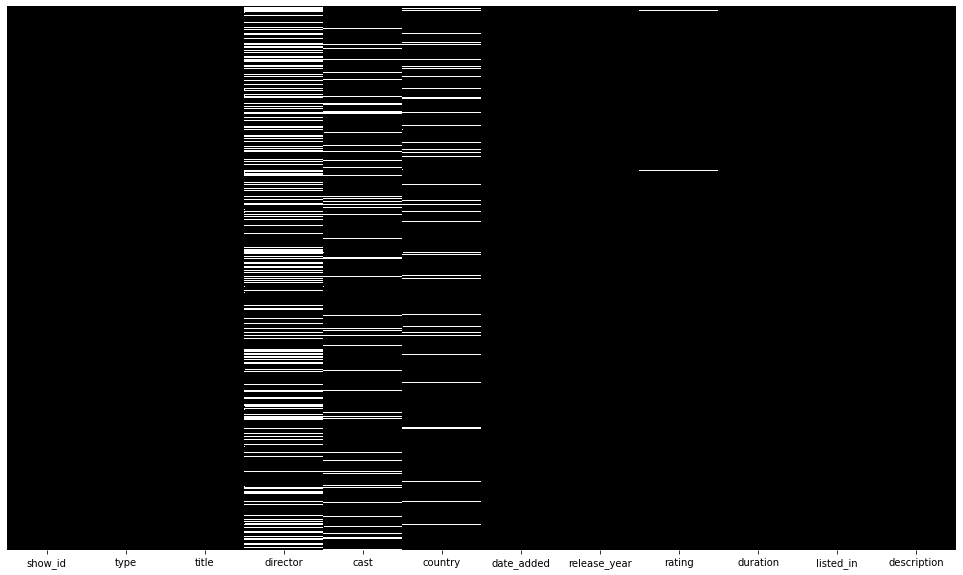

In [8]:
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='CMRmap');

### What to clean and organize? 

- Director column has too many missing values : drop column

- Cast Column has missing values and not needed for this analysis: drop column

- Country country has a enough values to replace with USA instead of using nan or removing it

- Show_id column is not needed for this analysis: can be dropped 

- Date_added column has only 10 values missing. Can replace those values for Jan 1st for simplicity

- Rating has 7 values missing: replace values with NA

## Clean Data

In [19]:
# Drop Show_id / Cast / Director 
df.drop(['show_id','director','cast'],axis=1, inplace = True)

In [20]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
#Change missing values to January 1st 
df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [22]:
#Check date_added misisng values are 0 
df.isnull().sum()

type              0
title             0
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [23]:
# Rating values change to NA for missing values 
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [24]:
#Replace function
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [25]:
#Check nan values are gone 
df['rating'].isnull().sum()

0

In [26]:
# Country missing values replace with USA for simplicity 
df['country'].replace(np.nan, 'United States',inplace  = True)

In [27]:
# Check values are replaced
df['country'].isnull().sum()

0

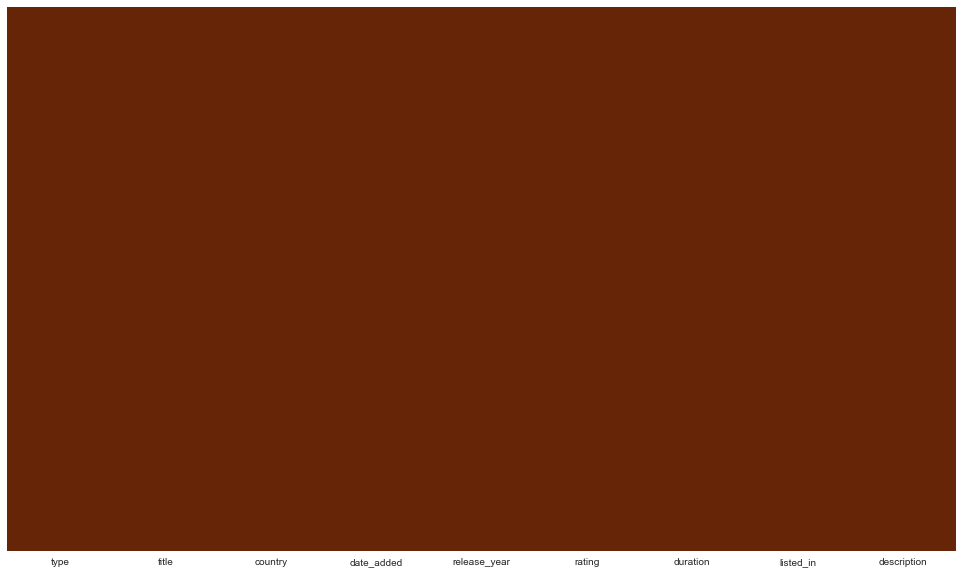

In [31]:
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlOrBr_r');

In [29]:
#Check entire df are 0 for missing values 
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data has been cleaned and organized to begin the EDA Process 

-----

### EDA(Exploratory Data Analysis)

- What is more viewed, tv shows or movies?
- What countries have the highest viewing rates?
- What genre (listed in) is the most popular?
- Do different countries prefer a certain genre of movie?
- What movie rating is the highest/lowest 
- Trend of movie / tv show releases in the past decade


In [32]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Movie      5377
TV Show    2410
Name: type, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


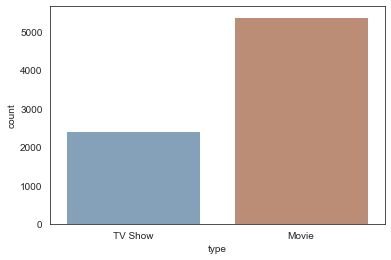

In [44]:
# What is more popular: TV Shows or Movies?

print(df.type.value_counts())
sns.countplot(df.type,palette="twilight_shifted")
plt.show();

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64


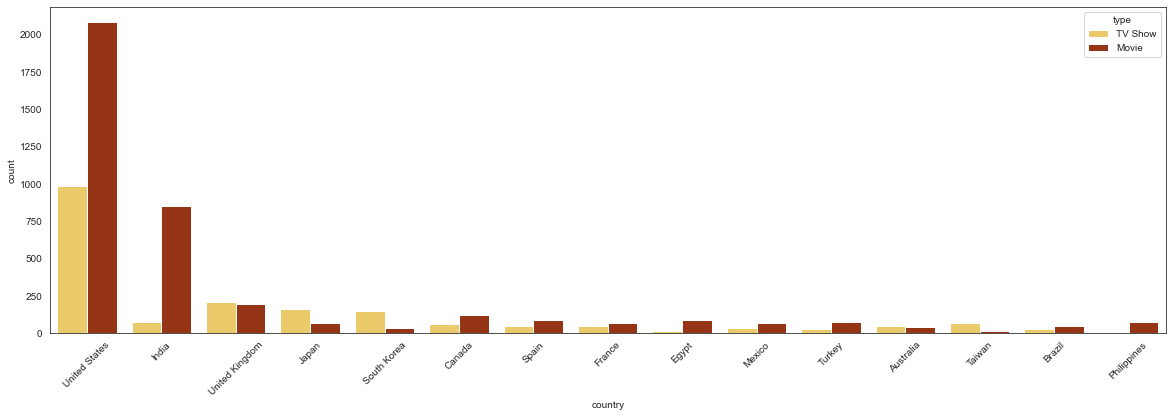

In [47]:
# Lets see what countries make up these two main types of viewing (TOP 15)

print(df["country"].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x="country",data= df,hue= "type",order = df['country'].value_counts().index[0:15],palette="afmhot_r")
plt.xticks(rotation=45)
plt.show()